In [552]:
import pandas as pd
import quandl as q
import yfinance as yf
import matplotlib.style as style
import numpy as np

style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.rcParams['font.family'] = "serif"

company_code = 'MNST'
company = yf.Ticker(f"{company_code}")


In [553]:
# get stock info
company.info

{'zip': '92879',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 1273,
 'longBusinessSummary': 'Monster Beverage Corporation, through its subsidiaries, develops, markets, sells, and distributes energy drink beverages and concentrates in the United States and internationally. It operates through three segments: Monster Energy Drinks, Strategic Brands, and Other. The company offers carbonated energy drinks, non-carbonated dairy based coffee and energy drinks, non-carbonated energy shakes, non-carbonated energy teas, non-carbonated energy drinks, and ready-to-drink packaged energy drinks primarily to bottlers and beverage distributors, as well as sells directly to retail grocery and specialty chains, wholesalers, club stores, drug stores, mass merchandisers, convenience chains, food service customers, and the military; and concentrates and/or beverage bases to bottling and canning operations. Monster Beverage Corporation sells its products under the Monster Energy, Monster Energy U

In [554]:
company_data = company.history(period="max")

In [555]:
company_data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-01,85.480003,87.029999,84.980003,86.680000,2499200,0.0,0.0
2020-12-02,87.839996,88.459999,85.820000,86.260002,1741200,0.0,0.0
2020-12-03,85.730003,86.769997,85.559998,86.519997,2465500,0.0,0.0
2020-12-04,86.139999,87.610001,86.129997,87.440002,1469700,0.0,0.0
2020-12-07,86.949997,87.760002,86.665001,87.169998,1197824,0.0,0.0


In [556]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8822 entries, 1985-12-09 to 2020-12-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8822 non-null   float64
 1   High          8822 non-null   float64
 2   Low           8822 non-null   float64
 3   Close         8822 non-null   float64
 4   Volume        8822 non-null   int64  
 5   Dividends     8822 non-null   float64
 6   Stock Splits  8822 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 551.4 KB


In [557]:
company_data.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8822.000000,8822.000000,8822.000000,8822.000000,8.822000e+03,8822.000000,8822.000000
mean,12.593669,12.747903,12.441661,12.596460,4.658711e+06,0.000001,0.001249
std,20.814162,21.030544,20.588470,20.816073,1.036423e+07,0.000111,0.061152
min,0.013021,0.013021,0.012370,0.013021,0.000000e+00,0.000000,0.000000
25%,0.066046,0.072917,0.064792,0.065658,2.448000e+05,0.000000,0.000000
50%,0.186421,0.239685,0.186421,0.186421,1.742400e+06,0.000000,0.000000
75%,15.968750,16.186667,15.721250,15.945000,4.665825e+06,0.000000,0.000000
max,87.839996,88.459999,86.665001,87.440002,2.709882e+08,0.010420,4.000000


In [558]:
# assign `Adj Close` to `daily_close`
daily_close = company_data[['Close']]
# returns as fractional change
daily_return = daily_close.pct_change()
# replacing NA values with 0
daily_return.fillna(0, inplace=True)
print(daily_return)


               Close
Date                
1985-12-09  0.000000
1985-12-10  0.000000
1985-12-11  0.000000
1985-12-12  0.000000
1985-12-13  0.000000
...              ...
2020-12-01  0.022411
2020-12-02 -0.004845
2020-12-03  0.003014
2020-12-04  0.010633
2020-12-07 -0.003088

[8822 rows x 1 columns]


In [559]:
mdata = company_data.resample('M').apply(lambda x: x[-1])

monthly_return = mdata.pct_change()
monthly_return

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-31,0.400000,0.142857,0.400000,0.400000,4.125000,NaN,NaN
1986-02-28,0.142857,0.250000,0.142857,0.142857,-0.060976,NaN,NaN
1986-03-31,0.250000,0.200000,0.250000,0.250000,-0.129870,NaN,NaN
1986-04-30,0.000000,0.000000,0.000000,0.000000,-0.164179,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-31,0.085648,0.082696,0.083713,0.068552,0.325677,NaN,NaN
2020-09-30,-0.048448,-0.046016,-0.043248,-0.043644,0.216251,NaN,NaN
2020-10-31,-0.043570,-0.047372,-0.052612,-0.045262,-0.039613,NaN,NaN


In [560]:
# assigning adjusted closing prices to 

adj_price = company_data['Close']
adj_price

Date
1985-12-09     0.133158
1985-12-10     0.133158
1985-12-11     0.133158
1985-12-12     0.133158
1985-12-13     0.133158
                ...    
2020-12-01    86.680000
2020-12-02    86.260002
2020-12-03    86.519997
2020-12-04    87.440002
2020-12-07    87.169998
Name: Close, Length: 8822, dtype: float64

In [561]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()


In [562]:
# print the result
print(mav[-10:])


Date
2020-11-23    80.8594
2020-11-24    80.8804
2020-11-25    80.9246
2020-11-27    80.9934
2020-11-30    81.1092
2020-12-01    81.2752
2020-12-02    81.4158
2020-12-03    81.5904
2020-12-04    81.7792
2020-12-07    81.9468
Name: Close, dtype: float64


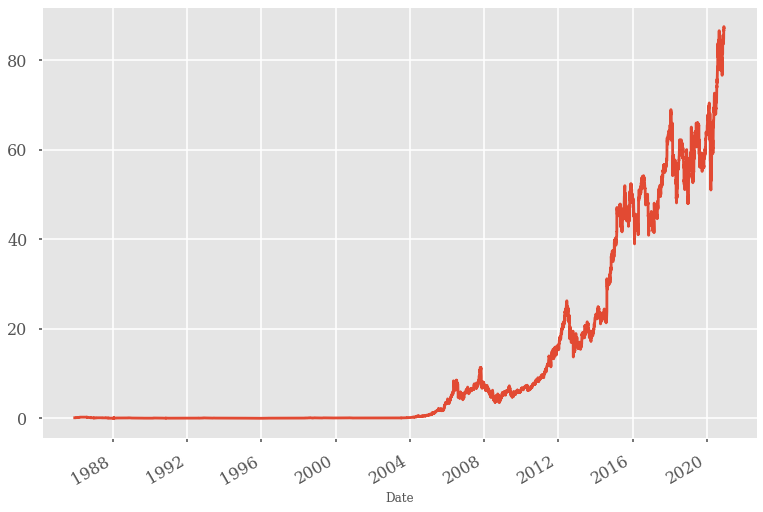

In [563]:
# import the matplotlib package to see the plot

import matplotlib.pyplot as plt

adj_price.plot()


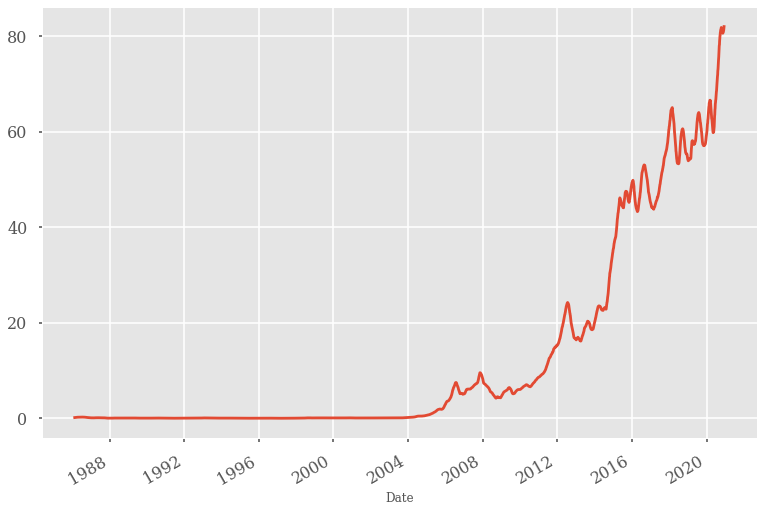

In [564]:
mav.plot()


In [565]:
# step1: initialize the short and long lookback periods

short_lb = 50
long_lb = 120


In [566]:
# step2: initialize a new DataFrame called signal_df with a signal column

signal_df = pd.DataFrame(index=company_data.index)
signal_df['signal'] = 0.0


In [567]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = company_data['Close'].rolling(window=short_lb,                                     min_periods=1, center=False).mean()


In [568]:
# step4: create long simple moving average over the long lookback period

signal_df['long_mav'] = company_data['Close'].rolling(window=long_lb, min_periods=1, center=False).mean()


In [569]:
# step5: generate the signals based on the conditional statement

signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)   


In [570]:
# step6: create the trading orders based on the positions column

signal_df['positions'] = signal_df['signal'].diff()


In [571]:
# sell
signal_df[signal_df['positions'] == -1.0]


,signal,short_mav,long_mav,positions
Date,,,,
1986-08-19,0.0,0.258327,0.258993,-1.0
1987-06-30,0.0,0.123038,0.123393,-1.0
1988-09-26,0.0,0.082579,0.082665,-1.0
1989-01-30,0.0,0.087096,0.087405,-1.0
1990-08-14,0.0,0.067197,0.067769,-1.0
1992-05-29,0.0,0.046875,0.046897,-1.0
1993-03-19,0.0,0.078828,0.079036,-1.0
1993-08-25,0.0,0.063750,0.063878,-1.0
1994-02-07,0.0,0.056016,0.056109,-1.0


In [572]:
# buy
signal_df[signal_df['positions'] == 1.0]



,signal,short_mav,long_mav,positions
Date,,,,
1986-02-20,1.0,0.170442,0.169711,1.0
1987-03-26,1.0,0.121973,0.121840,1.0
1988-03-01,1.0,0.049535,0.049269,1.0
1988-11-03,1.0,0.083730,0.083499,1.0
1990-03-08,1.0,0.038861,0.038474,1.0
1991-07-19,1.0,0.034062,0.034028,1.0
1992-08-24,1.0,0.046458,0.046224,1.0
1993-08-06,1.0,0.064792,0.064768,1.0
1994-01-13,1.0,0.057865,0.057845,1.0


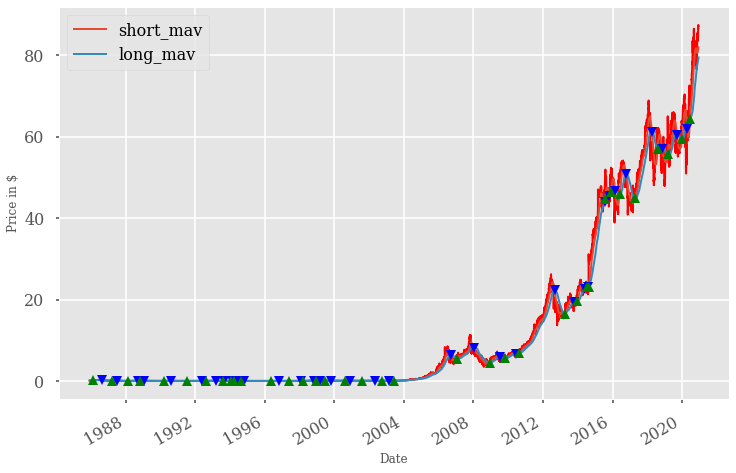

In [573]:
# initialize the plot using 
fig = plt.figure(figsize=(20,10))

# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')
company_data['Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals

plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0],'v',markersize=10, color='b')

# plotting the buy signals

plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,signal_df.short_mav[signal_df.positions == 1.0],'^', markersize=10, color='g')         
# Show the plotplt.show()



In [490]:
company_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-24,75.655952,75.655952,75.655952,75.655952,1408769,0.0,0
1997-07-25,74.571281,74.571281,74.571281,74.571281,1156390,0.0,0
1997-07-28,75.384804,75.384804,75.384804,75.384804,36335,0.0,0
1997-07-29,75.655952,75.655952,75.655952,75.655952,8529,0.0,0
1997-07-30,75.927132,75.927132,75.927132,75.927132,4049,0.0,0
...,...,...,...,...,...,...,...
2020-12-01,142.699997,142.699997,135.800003,141.000000,536747,0.0,0
2020-12-02,140.000000,142.800003,137.800003,141.699997,749064,0.0,0
2020-12-03,142.500000,144.399994,139.000000,140.199997,471704,0.0,0


In [574]:
signal_df

,signal,short_mav,long_mav,positions
Date,,,,
1985-12-09,0.0,0.133158,0.133158,NaN
1985-12-10,0.0,0.133158,0.133158,0.0
1985-12-11,0.0,0.133158,0.133158,0.0
1985-12-12,0.0,0.133158,0.133158,0.0
1985-12-13,0.0,0.133158,0.133158,0.0
...,...,...,...,...
2020-12-01,1.0,81.275200,78.881167,0.0
2020-12-02,1.0,81.415800,79.030833,0.0
2020-12-03,1.0,81.590400,79.178500,0.0


# BackTesting

First off, you’ll create set a variable initial_capital to set your initial capital and a new DataFrame positions. Once again, you copy the index from another DataFrame; In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.
    
On the days that the signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you’ll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation 100*signals['signal'].
    
A new DataFrame portfolio is created to store the market value of an open position.
Next, you create a DataFrame that stores the differences in positions (or number of stock)
    
Then the real backtesting begins: you create a new column to the portfolio DataFrame with name holdings, which stores the value of the positions or shares you have bought, multiplied by the ‘Close’ price.
    
Your portfolio also contains a cash column, which is the capital that you still have left to spend: it is calculated by taking your initial_capital and subtracting your holdings (the price that you paid for buying stock).
    
You’ll also add a total column to your portfolio DataFrame, which contains the sum of your cash and the holdings that you own, and
 
Lastly, you also add a returns column to your portfolio, in which you’ll store the returns


In [575]:
# Set the initial capital
initial_capital= float(5000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signal_df.index).fillna(0.0)

# Buy a 100 shares
positions[f"{company_code}"] = 100*signal_df['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(company_data['Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(company_data['Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(company_data['Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()


In [576]:
portfolio

,MNST,holdings,cash,total,returns
Date,,,,,
1985-12-09,0.000000,0.000000,5000.000000,5000.000000,NaN
1985-12-10,0.000000,0.000000,5000.000000,5000.000000,0.000000
1985-12-11,0.000000,0.000000,5000.000000,5000.000000,0.000000
1985-12-12,0.000000,0.000000,5000.000000,5000.000000,0.000000
1985-12-13,0.000000,0.000000,5000.000000,5000.000000,0.000000
...,...,...,...,...,...
2020-12-01,8668.000031,8668.000031,-32.659229,8635.340801,0.022498
2020-12-02,8626.000214,8626.000214,-32.659229,8593.340985,-0.004864
2020-12-03,8651.999664,8651.999664,-32.659229,8619.340435,0.003026


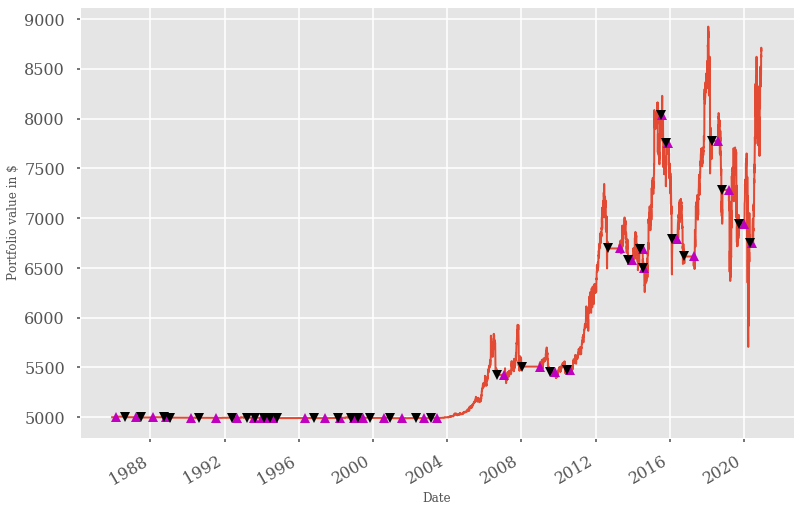

In [577]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signal_df.positions == 1.0].index, 
         portfolio.total[signal_df.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signal_df.positions == -1.0].index, 
         portfolio.total[signal_df.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

# Evaluating Moving Average Crossover Strategy

# Sharpe ratio 
to get to know whether your portfolio’s returns are the result of the fact that you decided to make smart investments or to take a lot of risks.

Usually, a ratio greater than 1 is acceptable by investors, 2 is very good and 3 is excellent.


Note that the risk free rate that is excluded in the definition of the Sharpe ratio for this tutorial and that the Sharpe ratio is usually not considered as a standalone: it’s usually compared to other stocks. The best way to approach this issue is thus by extending your original trading strategy with more data (from other companies)!

In [578]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.2283752412700797


# Maximum Drawdown, 
which is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy

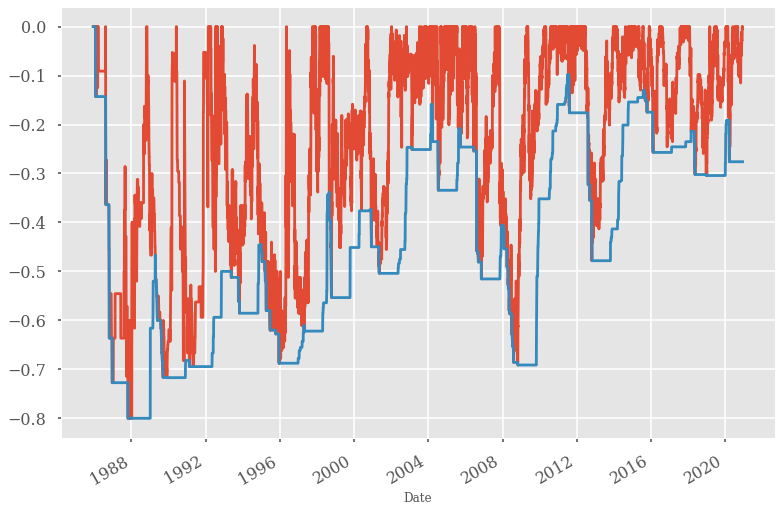

In [579]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = company_data['Close'].rolling(window, min_periods=1).max()
daily_drawdown = company_data['Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

# Compound Annual Growth Rate (CAGR),

Compound Annual Growth Rate (CAGR), which provides you with a constant rate of return over the time period. In other words, the rate tells you what you really have at the end of your investment period. You can calculate this rate by first dividing the investments ending value (EV) by the investment’s beginning value (BV). You raise the result to the power of 1/n, where n is the number of periods. You subtract 1 from the consequent result and there’s your CAGR!

Maybe a formula is more clear:
(EV/BV)**1/n − 1

In [580]:
# Get the number of days in `company`
days = (company_data.index[-1] - company_data.index[0]).days

# Calculate the CAGR 
cagr = ((((company_data['Close'][-1]) / company_data['Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.20340846119052491


# Nerual Network

In [630]:
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow import keras

In [628]:
inputs, targets = generate_series(company_data, 4)

In [617]:
print(inputs[3818])

[0.08984375 0.0859375  0.0859375  0.08333334 0.        ]


In [618]:
h_min = company_data.min()
normalized_h = (company_data - h_min) / (company_data.max() - h_min)


In [619]:
inputs, targets = generate_series(normalized_h, 4)


In [633]:
def create_model(n):
    
    m = keras.Sequential()
    m.add(keras.layers.Dense(64, activation='relu', input_shape=(n+1,)))
    m.add(keras.layers.Dense(64, activation='relu'))
    m.add(keras.layers.Dense(1))
    return m


In [650]:
train_inputs = inputs[:-1000]
val_inputs = inputs[-1000:]
train_targets = targets[:-1000]
val_targets = targets[-1000:]


In [625]:
def select_inputs(data, start, end, epochs):
    models = {}
    for inputs in range(start, end+1):
        print('Using {} inputs'.format(inputs))
        model_inputs, targets = generate_series(data, inputs)
        
        train_inputs = model_inputs[:-1000]
        val_inputs = model_inputs[-1000:]
        train_targets = targets[:-1000]
        val_targets = targets[-1000:]
        
        m = create_model(inputs)
        print('Training')
        m.compile(optimizer='adam', loss='mse') 
        h = m.fit(train_inputs, train_targets,
                  epochs=epochs,
                  batch_size=32,
                  validation_data=(val_inputs, val_targets))
        model_info = {'model': m, 'history': h.history}
        models[inputs] = model_info
    return models


In [668]:
trained_models = select_inputs(normalised_h, 2, 10, 20)


Using 2 inputs
Training
Epoch 1/20
245/245 [==============================] - 0s 2ms/step - loss: 10.8201 - val_loss: 1.3878
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0977 - val_loss: 1.4039
Epoch 3/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1021 - val_loss: 1.2488
Epoch 4/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0932 - val_loss: 1.3217
Epoch 5/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1054 - val_loss: 1.2271
Epoch 6/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0961 - val_loss: 1.4164
Epoch 7/20
245/245 [==============================] - 1s 5ms/step - loss: 0.0960 - val_loss: 1.3731
Epoch 8/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0952 - val_loss: 1.4803
Epoch 9/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1035 - val_loss: 1.4901
Epoch 10/20
245/245 [==============================] - 0s 2ms/step - loss: 

245/245 [==============================] - 0s 2ms/step - loss: 3.0460 - val_loss: 3.5511
Epoch 2/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1948 - val_loss: 2.2238
Epoch 3/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1783 - val_loss: 3.3655
Epoch 4/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1456 - val_loss: 1.6746
Epoch 5/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1524 - val_loss: 5.1760
Epoch 6/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1504 - val_loss: 1.4959
Epoch 7/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1737 - val_loss: 1.5016
Epoch 8/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 1.4293
Epoch 9/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1517 - val_loss: 3.3983
Epoch 10/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 2.0371
Epoch 11/2

245/245 [==============================] - 1s 3ms/step - loss: 4.0347 - val_loss: 2.9205
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1978 - val_loss: 2.8666
Epoch 3/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1834 - val_loss: 2.2810
Epoch 4/20
245/245 [==============================] - 1s 3ms/step - loss: 0.1793 - val_loss: 3.1124
Epoch 5/20
245/245 [==============================] - 1s 4ms/step - loss: 0.1857 - val_loss: 7.0234
Epoch 6/20
245/245 [==============================] - 0s 1ms/step - loss: 0.1646 - val_loss: 3.5905
Epoch 7/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1887 - val_loss: 1.6417
Epoch 8/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1665 - val_loss: 1.5594
Epoch 9/20
245/245 [==============================] - 0s 2ms/step - loss: 0.2094 - val_loss: 1.7375
Epoch 10/20
245/245 [==============================] - 0s 2ms/step - loss: 0.1621 - val_loss: 10.9469
Epoch 11/

In [669]:
model_stats = {}
for k, v in trained_models.items():
    train_history = v['history']
    loss = train_history['loss'][-1]
    val_loss = train_history['val_loss'][-1]
    model_stats[k] = {'inputs': k, 'loss': loss, 'val_loss': val_loss}


In [670]:
model_stats

{2: {'inputs': 2, 'loss': 0.11690431088209152, 'val_loss': 2.342102289199829},
 3: {'inputs': 3, 'loss': 0.11067838221788406, 'val_loss': 1.3038840293884277},
 4: {'inputs': 4, 'loss': 0.11468808352947235, 'val_loss': 2.8821511268615723},
 5: {'inputs': 5, 'loss': 0.16638651490211487, 'val_loss': 1.5896048545837402},
 6: {'inputs': 6, 'loss': 0.1430496722459793, 'val_loss': 2.7804224491119385},
 7: {'inputs': 7, 'loss': 0.15437112748622894, 'val_loss': 5.483019828796387},
 8: {'inputs': 8, 'loss': 0.1446351855993271, 'val_loss': 4.333497047424316},
 9: {'inputs': 9, 'loss': 0.1294618546962738, 'val_loss': 8.414422035217285},
 10: {'inputs': 10,
  'loss': 0.1368335783481598,
  'val_loss': 1.7886903285980225}}

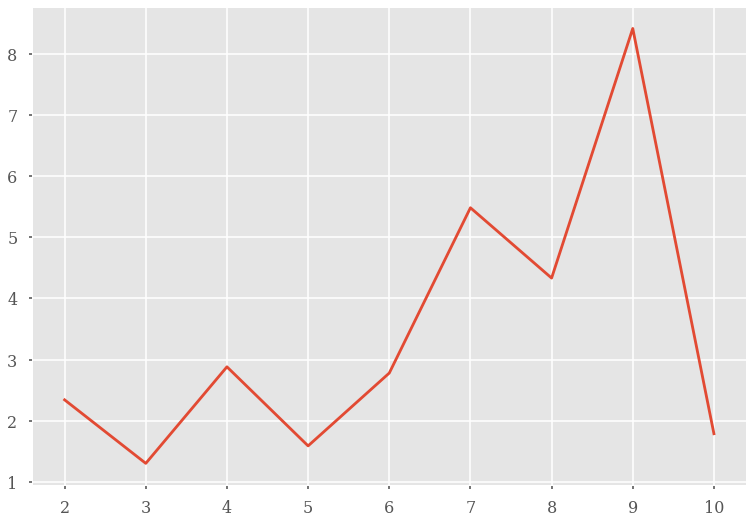

In [671]:
val_loss = []
indices = []
for k, v in model_stats.items():
    indices.append(k)
    val_loss.append(v['val_loss'])
plt.plot(indices, val_loss)


In [680]:
close_min = company_data['Close'].min()
close_max = company_data['Close'].max()
for k in model_stats:
    e = ((close_max - close_min) * model_stats[k]['val_loss'] + close_min)
    print(k, e)


2 204.7759545958489
3 114.00766588982975
4 251.99079439373094
5 138.98737521931244
6 243.09696315506855
7 479.37689456360584
8 378.8775874981722
9 735.6605413511402
10 156.3928172944554
